In [16]:
# 1.
# Import necessary libraries
# These libraries are essential for data manipulation, visualization, and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import plotly.express as px

In [17]:
# 2.
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [18]:
# 3.
# Load the dataset
# Replace 'breast_cancer_data.csv' with your actual filename
df = pd.read_csv('/content/Referral-Deferral-5DATA002W.2 Coursework Dataset(02062025).csv')

In [19]:
# 4.
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Patient_ID  Month_of_Birth   Age     Sex   Occupation T_Stage N_Stage 6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  Survival_Months Mortality_Status
0      A0012              12  68.0  Female     Teaching      T1      N1       IIA      Poorly differentiated      3  Regional         4.0        Positive            Positive                    24.0                    1.0               60            Alive
1      A0013              12  50.0  Female      Medical      T2      N2      IIIA  Moderately differentiated      2  Regional        35.0        Positive            Positive                    14.0                    5.0               62            Alive
2      A0014              11  58.0  Female  Engineering      T3      N3      IIIC  Moderately differentiated      2  Regional        63.0        Positive            Positive                    14.0         

In [20]:
# 5.
# Check the dimensions of the dataset
print("\nDataset dimensions (rows, columns):")
print(df.shape)


Dataset dimensions (rows, columns):
(4024, 18)


In [21]:
# 6.
# List of column names
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Patient_ID', 'Month_of_Birth', 'Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']


In [22]:
# 7.
# Basic statistical summary of numerical columns
print("\nStatistical summary of variables:")
df.describe(include='all')


Statistical summary of variables:


,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
count,4024,4024.000000,4015.000000,4024,86,4024,4024,4024,4024,4024.000000,4016,4021.000000,4024,4024,4008.000000,3.970000e+03,4024.000000,4024
unique,4024,NaN,NaN,2,40,4,3,5,4,NaN,2,NaN,2,2,NaN,NaN,NaN,7
top,A4035,NaN,NaN,Female,House Person,T2,N1,IIA,Moderately differentiated,NaN,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,1,NaN,NaN,2561,4,1786,2732,1305,2351,NaN,3924,NaN,3755,3326,NaN,NaN,NaN,3399
mean,NaN,6.481362,53.995019,NaN,NaN,NaN,NaN,NaN,NaN,2.150596,NaN,30.456603,NaN,NaN,14.361277,5.042920e+03,71.472167,NaN
std,NaN,3.475442,8.988199,NaN,NaN,NaN,NaN,NaN,NaN,0.638234,NaN,21.107340,NaN,NaN,8.152846,3.174827e+05,25.361855,NaN
min,NaN,1.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,-18.000000,1.000000e+00,1.000000,NaN
25%,NaN,3.000000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,16.000000,NaN,NaN,9.000000,1.000000e+00,56.000000,NaN
50%,NaN,6.000000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,25.000000,NaN,NaN,14.000000,2.000000e+00,73.000000,NaN
75%,NaN,10.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,38.000000,NaN,NaN,19.000000,5.000000e+00,90.000000,NaN


In [23]:
# 8.
print("\nData Types: ")
df.dtypes


Data Types: 


,0
Patient_ID,object
Month_of_Birth,int64
Age,float64
Sex,object
Occupation,object
T_Stage,object
N_Stage,object
6th_Stage,object
Differentiated,object
Grade,int64


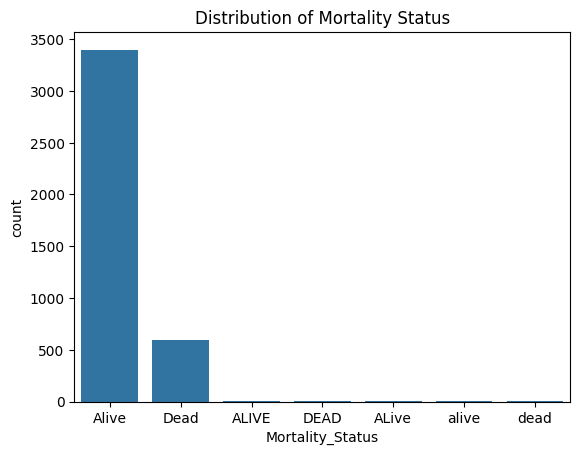

In [24]:
# 9.
# Bar Chart Showing the Distribution of the Categorical Target Variable: Mortality_Status
sns.countplot(x='Mortality_Status', data=df)
plt.title("Distribution of Mortality Status")
plt.show()


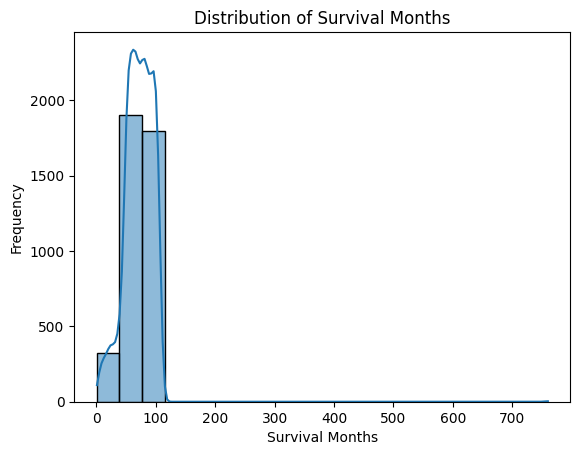

In [25]:
# 10.
#Histogram Showing the Distribution of the Continuous Target Variable: Survival_Months
sns.histplot(df['Survival_Months'], bins=20, kde=True)
plt.title("Distribution of Survival Months")
plt.xlabel("Survival Months")
plt.ylabel("Frequency")
plt.show()

In [26]:
# 11.
# Check original unique values
print("Before cleaning:")
print("Sex values:", df['Sex'].unique())
print("T_Stage:", df['T_Stage'].unique())
print("N_Stage:", df['N_Stage'].unique())
print("6th_Stage:", df['6th_Stage'].unique())
print("Differentiated:", df['Differentiated'].unique())
print("Grade:", df['Grade'].unique())
print("A_Stage:", df['A_Stage'].unique())
print("Estrogen_Status:", df['Estrogen_Status'].unique())
print("Progesterone_Status:", df['Progesterone_Status'].unique())
print("Mortality_Status values:", df['Mortality_Status'].unique())

Before cleaning:
Sex values: ['Female' 'Male']
T_Stage: ['T1' 'T2' 'T3' 'T4']
N_Stage: ['N1' 'N2' 'N3']
6th_Stage: ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
Differentiated: ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade: [3 2 1 4]
A_Stage: ['Regional' 'Distant' nan]
Estrogen_Status: ['Positive' 'Negative']
Progesterone_Status: ['Positive' 'Negative']
Mortality_Status values: ['Alive' 'Dead' 'ALIVE' 'DEAD' 'ALive' 'alive' 'dead']


In [27]:
print("Mortality_Status values:", df['Mortality_Status'].unique())

Mortality_Status values: ['Alive' 'Dead' 'ALIVE' 'DEAD' 'ALive' 'alive' 'dead']


In [28]:
# 12.
# First normalize the case of text to avoid mismatches
df['Mortality_Status'] = df['Mortality_Status'].str.lower().str.strip()
df['Mortality_Status'] = df['Mortality_Status'].replace({
    'alive': 'Alive',
    'dead': 'Dead'
    })
print(("Mortality_Status values:", df['Mortality_Status'].unique()))

('Mortality_Status values:', array(['Alive', 'Dead'], dtype=object))


In [29]:
# 13.
#  MANUAL MAPPING OF CATEGORICAL FEATURES

# 1. Sex: Female = 0, Male = 1
sex_mapping = {'Female': 0, 'Male': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

# 2. T_Stage: T1 < T2 < T3 < T4
t_stage_mapping = {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}
df['T_Stage'] = df['T_Stage'].map(t_stage_mapping)

# 3. N_Stage: N1 < N2 < N3
n_stage_mapping = {'N1': 1, 'N2': 2, 'N3': 3}
df['N_Stage'] = df['N_Stage'].map(n_stage_mapping)

# 4. 6th_Stage: Ordinal values based on clinical severity
stage_6_mapping = {'IIA': 1, 'IIB': 2, 'IIIA': 3, 'IIIB': 4, 'IIIC': 5}
df['6th_Stage'] = df['6th_Stage'].map(stage_6_mapping)

# 5. Differentiated: Ordinal values based on cell abnormality
differentiated_mapping = {
    'Undifferentiated': 1,
    'Poorly differentiated': 2,
    'Moderately differentiated': 3,
    'Well differentiated': 4
}
df['Differentiated'] = df['Differentiated'].map(differentiated_mapping)

# 6. A_Stage: Regional = 0, Distant = 1
a_stage_mapping = {'Regional': 0, 'Distant': 1}
df['A_Stage'] = df['A_Stage'].map(a_stage_mapping)

# 7. Estrogen_Status and Progesterone_Status: Negative = 0, Positive = 1
hormone_mapping = {'Negative': 0, 'Positive': 1}
df['Estrogen_Status'] = df['Estrogen_Status'].map(hormone_mapping)
df['Progesterone_Status'] = df['Progesterone_Status'].map(hormone_mapping)

# 8. Mortality_Status: Alive = 0, Dead = 1
mortality_mapping = {'Alive': 0, 'Dead': 1}
df['Mortality_Status'] = df['Mortality_Status'].map(mortality_mapping)



In [30]:
# 14.
# CHECK UNIQUE VALUES AFTER MAPPING
print("Sex:", df['Sex'].unique())
print("T_Stage:", df['T_Stage'].unique())
print("N_Stage:", df['N_Stage'].unique())
print("6th_Stage:", df['6th_Stage'].unique())
print("Differentiated:", df['Differentiated'].unique())
print("A_Stage:", df['A_Stage'].unique())
print("Estrogen_Status:", df['Estrogen_Status'].unique())
print("Progesterone_Status:", df['Progesterone_Status'].unique())
print("Mortality_Status:", df['Mortality_Status'].unique())

Sex: [0 1]
T_Stage: [1 2 3 4]
N_Stage: [1 2 3]
6th_Stage: [1 3 5 2 4]
Differentiated: [2 3 4 1]
A_Stage: [ 0.  1. nan]
Estrogen_Status: [1 0]
Progesterone_Status: [1 0]
Mortality_Status: [0 1]


In [31]:
print(df.head )

<bound method NDFrame.head of      Patient_ID  Month_of_Birth   Age  Sex   Occupation  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  Mortality_Status
0         A0012              12  68.0    0     Teaching        1        1          1               2      3      0.0         4.0                1                    1                    24.0                    1.0               60                 0
1         A0013              12  50.0    0      Medical        2        2          3               3      2      0.0        35.0                1                    1                    14.0                    5.0               62                 0
2         A0014              11  58.0    0  Engineering        3        3          5               3      2      0.0        63.0                1                    1                    14.0                    7.0          

Data Cleaning and Preprocessing

In [32]:
# 1.
print("\nPerforming feature selection by removing irrelevant variables...")

# List of irrelevant features to remove
# Corrected column name from 'Patient_ID' to 'PatientID'
irrelevant_features = ['Patient_ID', 'Month_of_Birth', 'Occupation',]
print(f"Removing the following irrelevant features: {irrelevant_features}")

# Actually remove the features from the DataFrame
df = df.drop(columns=irrelevant_features)



Performing feature selection by removing irrelevant variables...
Removing the following irrelevant features: ['Patient_ID', 'Month_of_Birth', 'Occupation']


In [33]:
# 2.
#Missing values
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
Age                        9
Sex                        0
T_Stage                    0
N_Stage                    0
6th_Stage                  0
Differentiated             0
Grade                      0
A_Stage                    8
Tumor_Size                 3
Estrogen_Status            0
Progesterone_Status        0
Regional_Node_Examined    16
Reginol_Node_Positive     54
Survival_Months            0
Mortality_Status           0
dtype: int64


In [34]:
# 3.
# Calculate percentage of missing values
print("\nPercentage of missing values per column:")
print(df.isnull().sum() * 100 / len(df))


Percentage of missing values per column:
Age                       0.223658
Sex                       0.000000
T_Stage                   0.000000
N_Stage                   0.000000
6th_Stage                 0.000000
Differentiated            0.000000
Grade                     0.000000
A_Stage                   0.198807
Tumor_Size                0.074553
Estrogen_Status           0.000000
Progesterone_Status       0.000000
Regional_Node_Examined    0.397614
Reginol_Node_Positive     1.341948
Survival_Months           0.000000
Mortality_Status          0.000000
dtype: float64


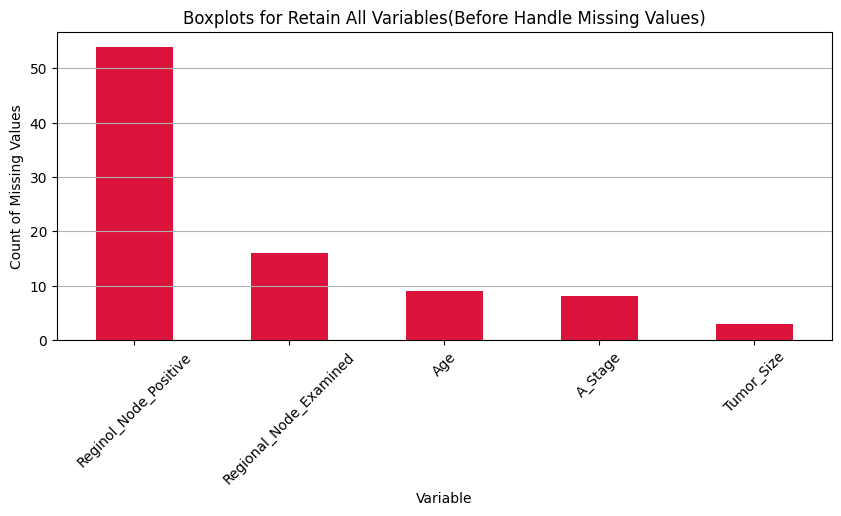

In [35]:
# 4.
# Count missing values
missing = df.isnull().sum()
missing = missing[missing > 0]  # Only columns with missing values

# Check if there are any missing values to plot
if not missing.empty:
    # Plot
    plt.figure(figsize=(10, 4))
    missing.sort_values(ascending=False).plot(kind='bar', color='crimson')
    plt.title('Missing Values per Variable')
    plt.xlabel('Variable')
    plt.ylabel('Count of Missing Values')
    plt.title('Boxplots for Retain All Variables(Before Handle Missing Values)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("No missing values to plot.")


In [36]:
# 5.
# Handle missing values
# For numerical columns, impute with median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
# For categorical columns, impute with most frequent value
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
if not categorical_columns.empty:
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])


# Verify missing values are handled
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


In [37]:
# 6.
# Count missing values
missing = df.isnull().sum()
missing = missing[missing > 0]  # Only columns with missing values

# Check if there are any missing values to plot
if not missing.empty:
    # Plot
    plt.figure(figsize=(10, 4))
    missing.sort_values(ascending=False).plot(kind='bar', color='crimson')
    plt.title('Missing Values per Variable')
    plt.xlabel('Variable')
    plt.ylabel('Count of Missing Values')
    plt.title('Boxplots for All Numerical Variables(Before Removing)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("\n After The Handle Missing Values: ")
    print("No missing values to plot.")


 After The Handle Missing Values: 
No missing values to plot.



========== OUTLIER DETECTION AND VISUALIZATION ==========


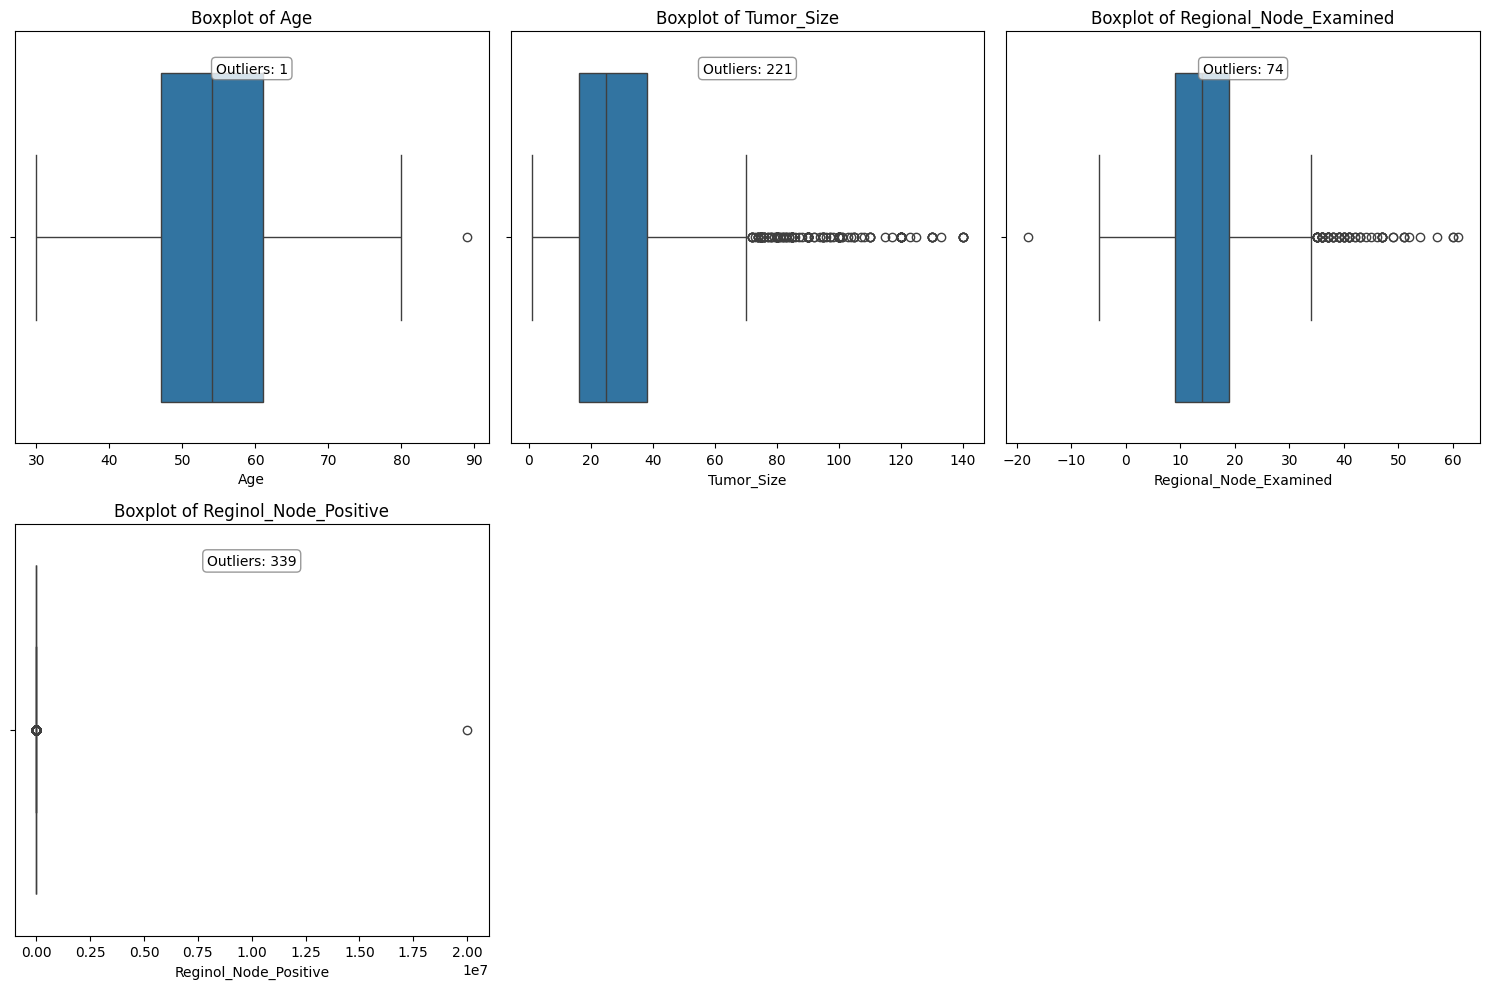

Number of outliers detected in each column:
Age: 1 outliers
Tumor_Size: 221 outliers
Regional_Node_Examined: 74 outliers
Reginol_Node_Positive: 339 outliers


<Figure size 640x480 with 0 Axes>

In [38]:
# 7.
#Outliers detection
print("\n========== OUTLIER DETECTION AND VISUALIZATION ==========")

# Function to detect and visualize outliers using boxplots
def detect_and_visualize_outliers(df, numerical_cols):
    """
    Detect and visualize outliers in numerical columns using boxplots
    Returns a dictionary with the count of outliers for each column
    """
    plt.figure(figsize=(15, 10))
    outliers_count = {}

    for i, col in enumerate(numerical_cols):
        # Plot boxplot
        plt.subplot(2, 3, i+1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')

        # Calculate IQR and identify outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_count[col] = len(outliers)

        # Add text annotation with outlier count
        plt.annotate(f'Outliers: {len(outliers)}',
                     xy=(0.5, 0.9),
                     xycoords='axes fraction',
                     ha='center',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.tight_layout()
    plt.savefig('outliers_boxplots.png')
    plt.show()
    return outliers_count
# List of numerical columns for outlier detection
numerical_cols = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']

# Detect and visualize outliers
outliers_count = detect_and_visualize_outliers(df, numerical_cols)
print("Number of outliers detected in each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")


plt.tight_layout()
plt.savefig('feature_relationships.png')
plt.show()


========== OUTLIER REMOVAL ==========
Original dataset shape: (4024, 15)
After removing outliers from Age: (4023, 15)
After removing outliers from Tumor_Size: (3802, 15)
After removing outliers from Regional_Node_Examined: (3735, 15)
After removing outliers from Reginol_Node_Positive: (3289, 15)
Total rows removed: 735 (18.27%)
After outliers removed:(3289, 15)


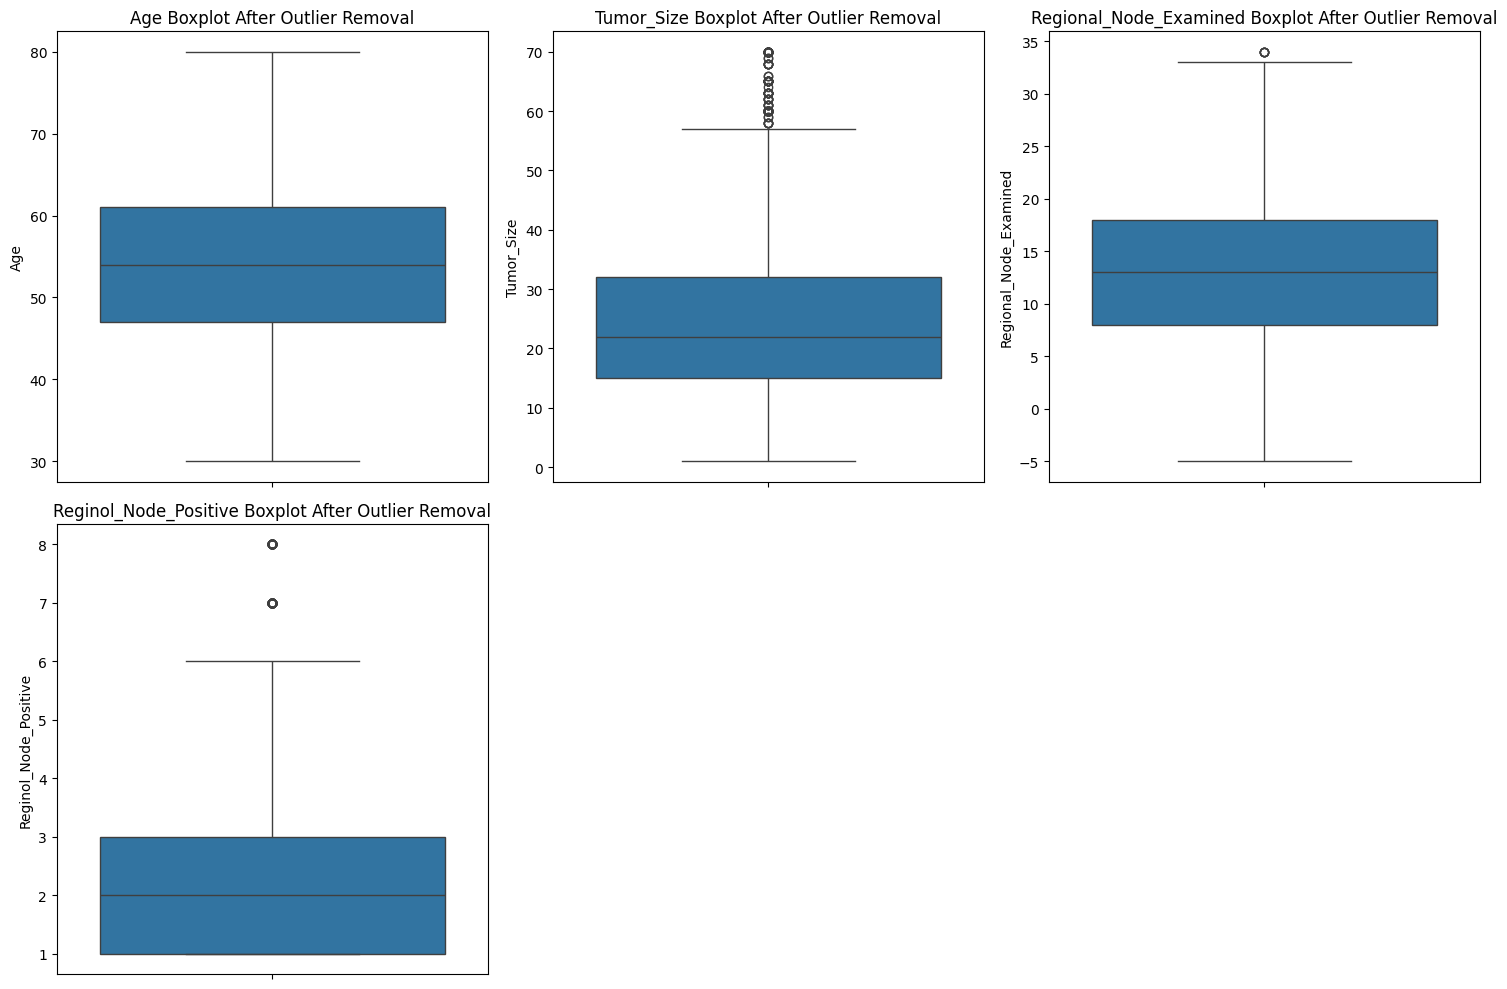

In [39]:
# 8.
# ========== OUTLIER REMOVAL ==========
print("\n========== OUTLIER REMOVAL ==========")

# Make a copy of the original DataFrame
df_clean = df.copy()

# List of numerical columns where outliers should be removed
columns_to_check = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive']

# Function to remove outliers using IQR method
def remove_outliers(df, col):
    """
    Remove outliers from a specific column using the IQR method
    Returns the dataframe with outliers removed
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Store the original shape for comparison
original_shape = df.shape
print(f"Original dataset shape: {original_shape}")


# Remove outliers from each numerical column one by one
for col in numerical_cols:
    # Check if the column has outliers
    if outliers_count[col] > 0:
        df_clean = remove_outliers(df_clean, col)
        print(f"After removing outliers from {col}: {df_clean.shape}")
# Report on the number of rows removed
rows_removed = original_shape[0] - df_clean.shape[0]
percentage_removed = (rows_removed / original_shape[0]) * 100
print(f"Total rows removed: {rows_removed} ({percentage_removed:.2f}%)")
print(f"After outliers removed:{df_clean.shape}")

# Visualize the data distribution after outlier treatment
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_clean, y=col)
    plt.title(f'{col} Boxplot After Outlier Removal')

plt.tight_layout()
plt.savefig('boxplots_after_outlier_removal.png')
plt.show()

df_clean.to_csv("cleaned_dataset.csv", index=False)


In [40]:
print(df_clean.head(100))

      Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  Mortality_Status
0    68.0  0.0      1.0      1.0        1.0             2.0    3.0      0.0         4.0              1.0                  1.0                    24.0                    1.0             60.0               0.0
1    50.0  0.0      2.0      2.0        3.0             3.0    2.0      0.0        35.0              1.0                  1.0                    14.0                    5.0             62.0               0.0
2    58.0  0.0      3.0      3.0        5.0             3.0    2.0      0.0        63.0              1.0                  1.0                    14.0                    7.0             75.0               0.0
3    58.0  0.0      1.0      1.0        1.0             2.0    3.0      0.0        18.0              1.0                  1.0                     2.0                   

In [41]:
# Use the cleaned dataset as the base for both classification and regression tasks
classification_df = df_clean
regression_df = df_clean
# Print confirmation
print("Cleaned dataset assigned to both classification_df and regression_df.")

Cleaned dataset assigned to both classification_df and regression_df.


In [42]:
#check the clss distribution in the classification data set (we want to see mortality status column)
print("\nOriginal Class Distribution in Classification Dataset:")
print(classification_df['Mortality_Status'].value_counts())


Original Class Distribution in Classification Dataset:
Mortality_Status
0.0    2904
1.0     385
Name: count, dtype: int64


In [43]:
# Split the dataset into majority and minority groups based on target label
dead_cases = classification_df[classification_df['Mortality_Status'] == 1]   # Minority class(Dead)
alive_cases = classification_df[classification_df['Mortality_Status'] == 0]  # Majority class(Alive)

In [44]:
# Count how many samples belong to the minority (dead) class
num_dead_samples = len(dead_cases)

In [45]:
# Randomly select a subset of the majority (alive) class equal to the minority (dead) count
alive_sampled = alive_cases.sample(n=num_dead_samples, random_state=42)

# Combine the downsampled alive group with the full dead group to balance the dataset
balanced_classification_df = pd.concat([alive_sampled, dead_cases], axis=0)

# Shuffle the combined dataset and reset the index
balanced_classification_df = balanced_classification_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [46]:
# Display the updated class distribution after balancing
print("\nUpdated Class Counts in the Balanced Dataset:")
print(balanced_classification_df['Mortality_Status'].value_counts())


Updated Class Counts in the Balanced Dataset:
Mortality_Status
1.0    385
0.0    385
Name: count, dtype: int64


In [47]:
# Remove the 'Survival_Months' feature since it's not required for the classification task
classification_data = balanced_classification_df.drop(['Survival_Months'], axis=1)

In [48]:
print(balanced_classification_df.shape)

(770, 15)


In [49]:
# Prepare a dataset for regression by selecting only rows where the patient is alive
# Drop the classification target column as it’s irrelevant for the regression task
regression_df = df_clean[df_clean['Mortality_Status'] == 1].drop(['Mortality_Status'], axis=1)

In [50]:
print(regression_df.shape)

(385, 14)


In [51]:
# Define output filenames for both classification and regression datasets
classification_output_path = "classification_dataset.csv"
regression_output_path = "regression_dataset.csv"

# Export the classification and regression datasets to CSV files
classification_df.to_csv(classification_output_path, index=False)
regression_df.to_csv(regression_output_path, index=False)

In [52]:
print("\n Data preparation is finished. The cleaned datasets have been successfully saved:")
print(f"--Classification dataset saved as: {classification_output_path}")
print(f"--Regression dataset saved as: {regression_output_path}")


 Data preparation is finished. The cleaned datasets have been successfully saved:
--Classification dataset saved as: classification_dataset.csv
--Regression dataset saved as: regression_dataset.csv
